#### Import of Libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [323]:
df = pd.read_csv('datasets/blocks/page-blocks.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df=df.drop(columns=["at1"])
#df=df.dropna(axis=0, how="any")
df=df.head(1500)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)


In [324]:
df.head(5)

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,Class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [325]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    1500 non-null   int64  
 1   length    1500 non-null   int64  
 2   area      1500 non-null   int64  
 3   eccen     1500 non-null   float64
 4   p_black   1500 non-null   float64
 5   p_and     1500 non-null   float64
 6   mean_tr   1500 non-null   float64
 7   blackpix  1500 non-null   int64  
 8   blackand  1500 non-null   int64  
 9   wb_trans  1500 non-null   int64  
 10  Class     1500 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.0 KB
Number of duplicated rows is:  9
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

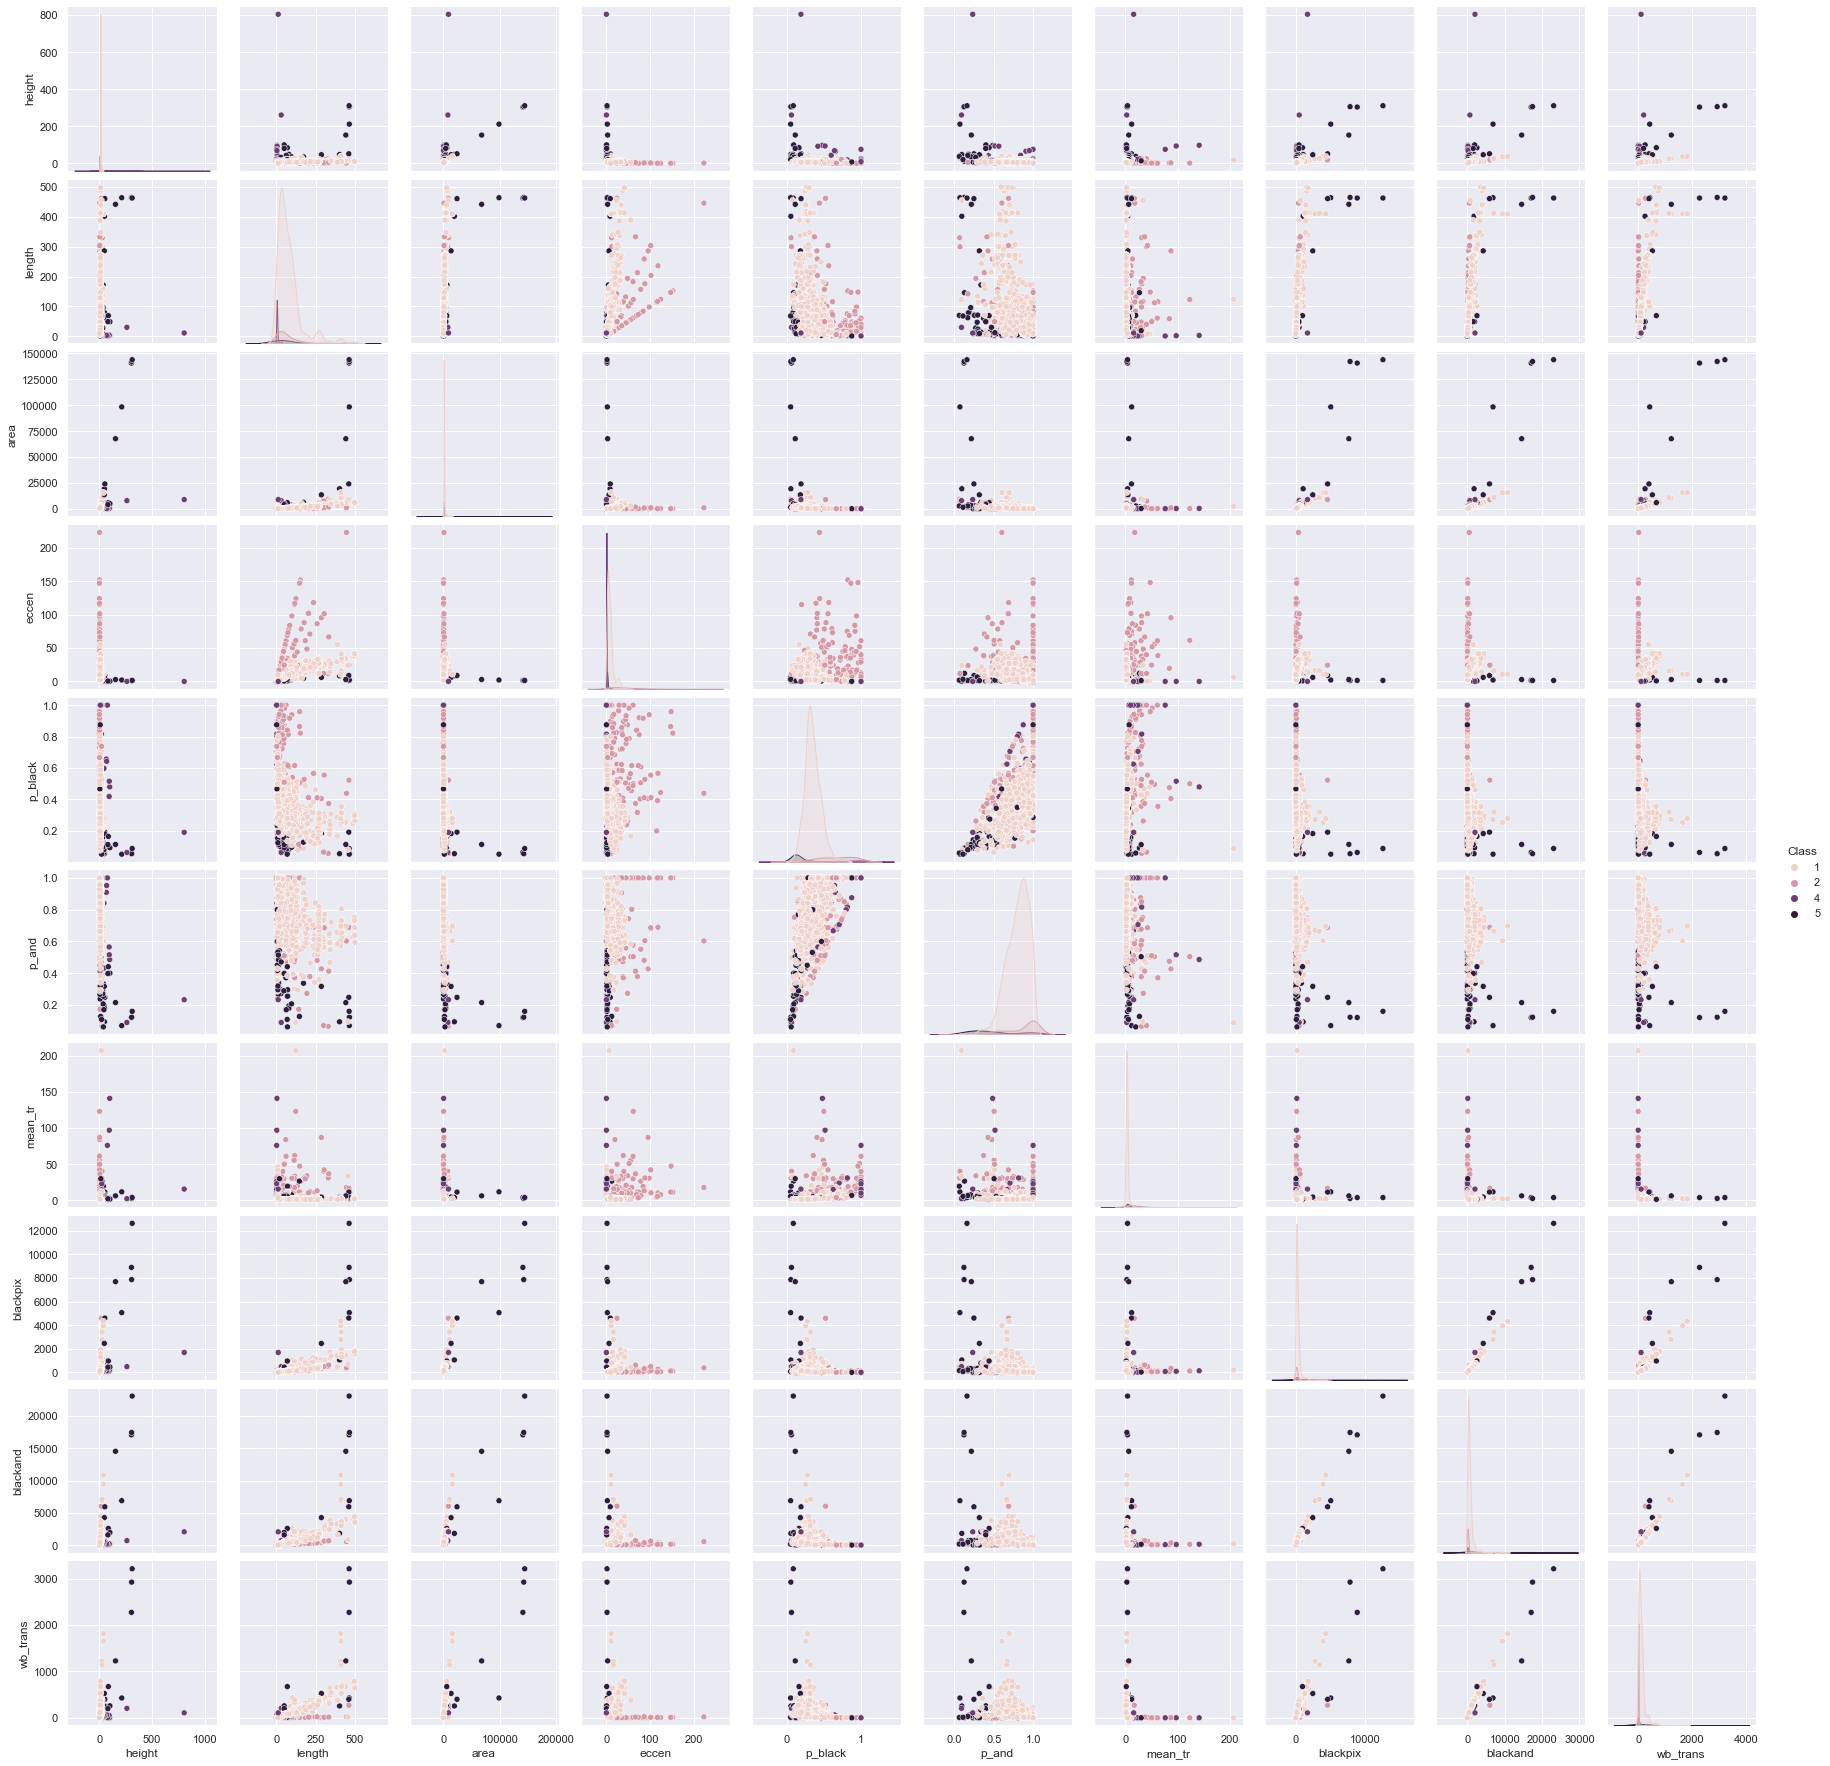

In [326]:
sns.pairplot(df, hue='Class')
plt.show()

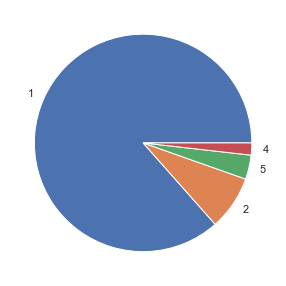

In [327]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [328]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height,1500.0,11.212667,27.215533,1.000,7.00000,9.0000,10.00000,804.0
length,1500.0,77.015333,86.379504,1.000,22.00000,48.0000,98.00000,500.0
area,1500.0,1228.348000,7182.758499,7.000,145.00000,400.0000,913.50000,143993.0
eccen,1500.0,10.559041,15.912449,0.013,2.83300,6.0830,10.78900,223.0
p_black,1500.0,0.372065,0.167339,0.052,0.27775,0.3390,0.42925,1.0
p_and,1500.0,0.789245,0.176759,0.062,0.69000,0.8215,0.92200,1.0
mean_tr,1500.0,4.722533,10.312012,1.070,1.89000,2.3300,3.16250,207.0
blackpix,1500.0,265.116667,611.304663,7.000,53.00000,150.5000,289.00000,12631.0
blackand,1500.0,609.402667,1217.003931,7.000,115.00000,337.5000,708.25000,23092.0
wb_trans,1500.0,105.611333,185.186026,1.000,17.00000,61.0000,128.00000,3212.0


#### Standardize the Data

In [329]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height,1500.0,-1.894781e-17,1.000334,-0.375377,-0.154841,-0.081329,-0.044573,29.139673
length,1500.0,7.579123e-17,1.000334,-0.880309,-0.637115,-0.336017,0.243017,4.898451
area,1500.0,9.473903e-18,1.000334,-0.170096,-0.150876,-0.115363,-0.043848,19.882649
eccen,1500.0,1.894781e-17,1.000334,-0.662975,-0.485696,-0.281386,0.014456,13.355066
p_black,1500.0,1.989520e-16,1.000334,-1.913316,-0.563807,-0.197661,0.341844,3.753727
p_and,1500.0,4.073778e-16,1.000334,-4.115710,-0.561657,0.182543,0.751305,1.192732
mean_tr,1500.0,5.684342e-17,1.000334,-0.354320,-0.274774,-0.232092,-0.151334,19.622254
blackpix,1500.0,-2.842171e-17,1.000334,-0.422380,-0.347106,-0.187558,0.039082,20.235421
blackand,1500.0,2.842171e-17,1.000334,-0.495153,-0.406381,-0.223494,0.081249,18.479887
wb_trans,1500.0,-1.894781e-17,1.000334,-0.565087,-0.478659,-0.240980,0.120939,16.780017


#### Observations and Variables

In [330]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

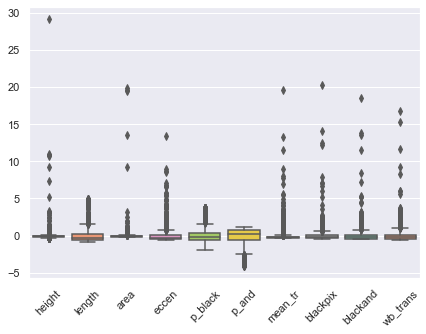

In [331]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

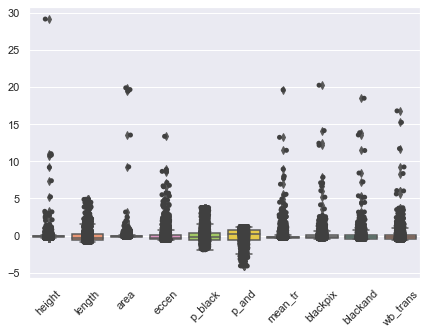

In [332]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

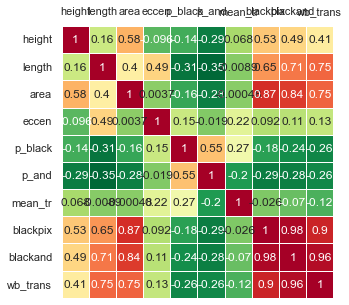

In [333]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [334]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [335]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.945774,-0.779264,-0.157345,0.471253,-0.165595,-0.706190
1,-1.222120,-0.396182,0.666366,0.120356,-0.130695,-0.076130
2,-0.834843,-0.830003,-0.316339,0.309624,-0.106237,-0.168093
3,-1.027193,-0.682459,0.003912,0.403508,-0.193818,-0.347227
4,-1.399566,-0.211182,1.137310,-0.029568,-0.104313,-0.079949
...,...,...,...,...,...,...
1495,0.170169,-0.987454,-1.481002,0.126902,0.099260,-0.443801
1496,0.507020,-0.275171,-1.292820,-0.435786,0.254083,-0.071498
1497,-1.750584,1.248990,1.994680,-0.004970,-0.098869,-0.597219
1498,10.217504,-6.360325,5.272128,15.054070,19.715485,7.641879


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [98.38%] of the variance'}, xlabel='PC1 (47.0% expl.var)', ylabel='PC2 (15.0% expl.var)'>)

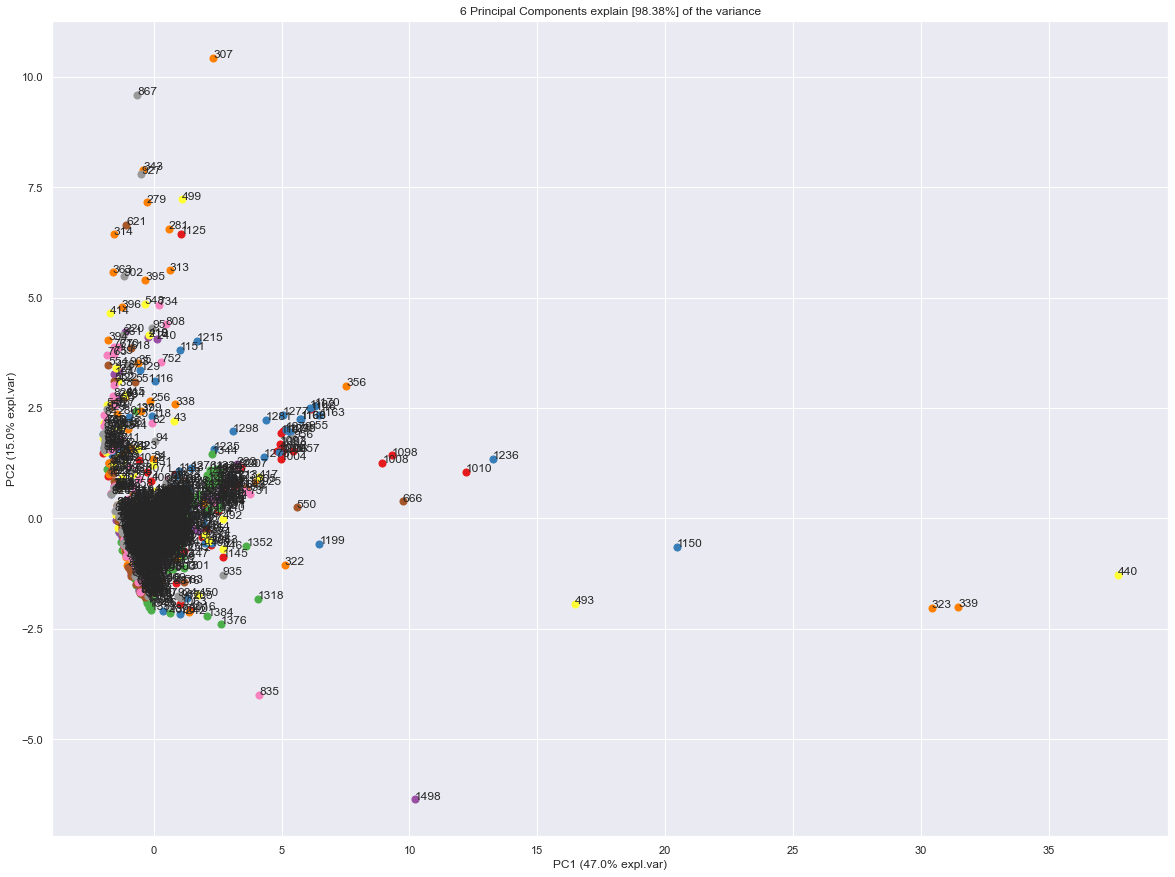

In [336]:
model.scatter(label=True, legend=False)

Eigenvectors

In [337]:
A = out['loadings'].T

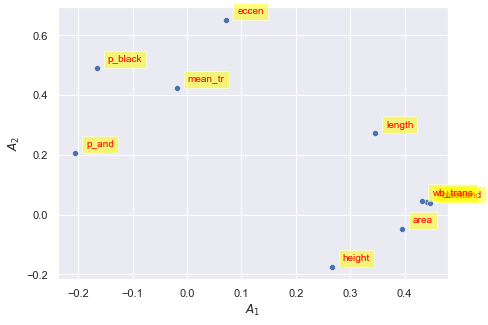

In [338]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

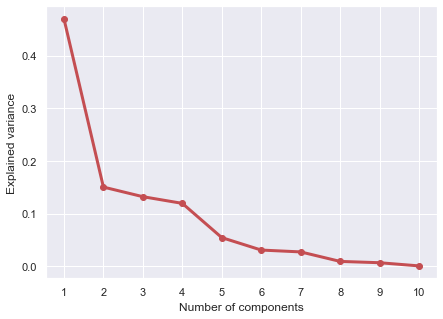

In [339]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

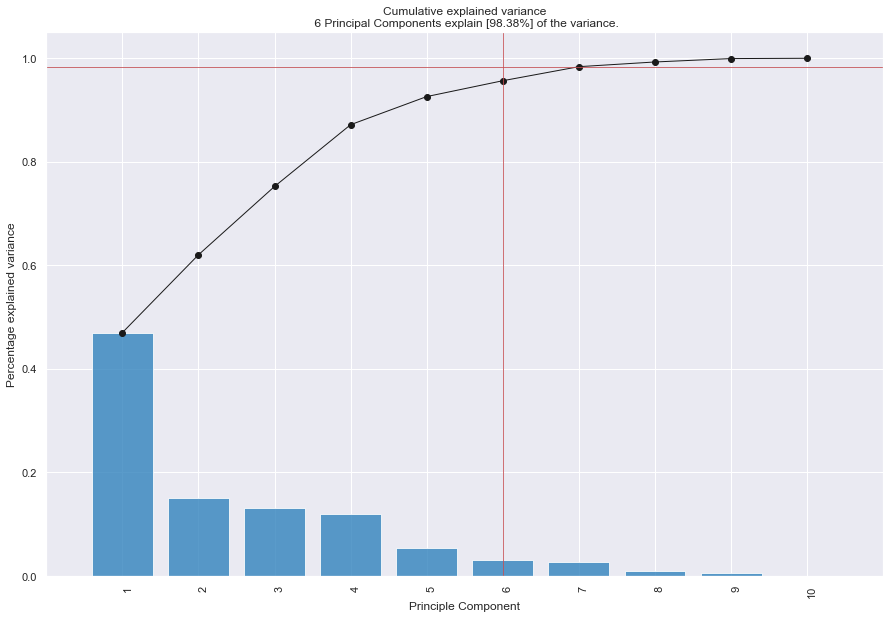

<Figure size 504x360 with 0 Axes>

In [340]:
model.plot();